In [3]:
from io import BytesIO
import requests
import pandas as pd

### Fetch & Load the dataset

In [5]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"

# GET Request for the dataset url
response = requests.get(url)
response.raise_for_status()

# Load data to Pandas DataFrame
csv_data = BytesIO(response.content)
covid19_data = pd.read_csv(csv_data)
covid19_data.head()

KeyboardInterrupt: 

### Basic infos about the dataset

In [ ]:
# Memory Usage in megabytes
print(f"Dataset's memory size: {covid19_data.memory_usage().sum()/1e6:.1f} MB")

Dataset's memory size: 223.8 MB


In [ ]:
# Dataset's Shape & Size
print(f"Number of Columns: {covid19_data.shape[1]}")
print(f"Number of Rows(observations): {covid19_data.shape[0]}")

print(f"Size: {covid19_data.size}")

Number of Columns: 61
Number of Rows(observations): 458548
Size: 27971428


In [ ]:
# Features(Columns)'s data types
print(covid19_data.dtypes)

country                        object
date                           object
total_cases                   float64
new_cases                     float64
new_cases_smoothed            float64
                               ...   
extreme_poverty               float64
diabetes_prevalence           float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
human_development_index       float64
Length: 61, dtype: object


In [ ]:
print(covid19_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458548 entries, 0 to 458547
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     458548 non-null  object 
 1   date                                        458548 non-null  object 
 2   total_cases                                 446750 non-null  float64
 3   new_cases                                   444606 non-null  float64
 4   new_cases_smoothed                          443386 non-null  float64
 5   total_cases_per_million                     446750 non-null  float64
 6   new_cases_per_million                       444606 non-null  float64
 7   new_cases_smoothed_per_million              443386 non-null  float64
 8   total_deaths                                446750 non-null  float64
 9   new_deaths                                  445200 non-null  float64
 

We see that there are 57 numerical cols and 4 categorical ones.

### Dates

In [ ]:
covid19_data['date'] = pd.to_datetime(covid19_data['date'])

In [ ]:
covid19_data.date.agg(['min','max'])

min   2020-01-01
max   2024-12-31
Name: date, dtype: datetime64[ns]

We see that this dataset contains data about covid-19 from 2020/01/01 to 2024/12/31.<br>
Five Years.

### Relevant Features
this dataset has many features 60 , we will select only these for analysis:

In [ ]:
cols = ['country', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'total_tests', 'new_tests', 'positive_rate', 'population', 'median_age', 'gdp_per_capita']
covid19_data = covid19_data[cols]
covid19_data.tail()

,country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_tests,new_tests,positive_rate,population,median_age,gdp_per_capita
458543,Zimbabwe,2024-11-20,266396.0,0.0,5740.0,0.0,16578.193,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,17.683,2207.957
458544,Zimbabwe,2024-11-21,266396.0,0.0,5740.0,0.0,16578.193,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,17.683,2207.957
458545,Zimbabwe,2024-11-22,266396.0,0.0,5740.0,0.0,16578.193,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,17.683,2207.957
458546,Zimbabwe,2024-11-23,266396.0,0.0,5740.0,0.0,16578.193,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,17.683,2207.957
458547,Zimbabwe,2024-11-24,266396.0,0.0,5740.0,0.0,16578.193,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,17.683,2207.957


### Sampling
We see that this dataset is big with nearly half million observations, which is too big for EDA.So to reduce the dataset size and focus our Exploratory Data Analysis.<br>
We will select few countries and focus on them.

In [ ]:
covid19_data.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England

We will continue with **Algeria**, **Saudi Arabia**, **Russia**, **Greenland**, **South Africa** and **Argentina**.

In [ ]:
selected_countries = ['Algeria',"Saudi Arabia","Russia","Greenland","South Africa","Argentina"]
subset_data = covid19_data[covid19_data['country'].isin(selected_countries)]

### Upload the Raw Data to the API

In [ ]:
# Convert the DataFrame to Json format for transmition
subset_data_json = subset_data.to_json()

In [ ]:
raw_data_url = "http://127.0.0.1:5000/raw_data"
response = requests.post(raw_data_url,json=subset_data_json)
print(response.status_code)

201


In [1]:
import requests
import numpy as np
import pandas as pd

### Fetch Raw Data from the API

In [2]:
raw_data_url = "http://127.0.0.1:5000/raw_data"
response = requests.get(raw_data_url)
print(response.status_code)

500


In [3]:
data = pd.DataFrame(response.json())
data.tail()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
print("Rows: {}\nColumns: {}".format(*data.shape))

Rows: 10753
Columns: 18


### Handling Missing Values

In [ ]:
data.isnull().sum().sort_values(ascending=False)

new_vaccinations            8403
people_fully_vaccinated     8297
people_vaccinated           8234
total_vaccinations          8082
new_tests                   7773
total_tests                 7638
positive_rate               7339
gdp_per_capita              1792
total_deaths_per_million      31
total_cases_per_million       31
new_deaths                    31
total_deaths                  31
new_cases                     31
total_cases                   31
date                           0
population                     0
median_age                     0
country                        0
dtype: int64

We see that there is a lot of missing values in most columns.<br>

Most features related to vaccinations are missing so we will drop them.

In [ ]:
vaccinations_cols = ['new_vaccinations','people_fully_vaccinated','people_vaccinated','total_vaccinations']
data.drop(vaccinations_cols,axis=1,inplace=True)

Same thing for test related features.

In [ ]:
test_cols = ['new_tests','total_tests','positive_rate']
data.drop(test_cols,axis=1,inplace=True)

**gdp_per_capita** is same in all dates for each country.

In [ ]:
data.gdp_per_capita.nunique()

5

We can see that only **greenland** country doesnt have gdp_per_capita.<br>

In [ ]:
data[data['gdp_per_capita'].isnull()].country.unique()

array(['Greenland'], dtype=object)

I will get it from ethernet and fill it:
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=GL
#### Note:
this is the gdp_per_capita in 2020 not currently.

In [ ]:
data.loc[data['gdp_per_capita'].isnull(),'gdp_per_capita'] = 54_693

In [ ]:
rest_cols = ['total_deaths_per_million', 'total_cases_per_million', 'new_deaths', 'total_deaths', 'new_cases', 'total_cases']
dates = [data[data[col].isnull()].date.unique() for col in rest_cols]
np.unique(dates)

array(['2020-01-01', '2020-01-02', '2020-01-03', '2024-11-30',
       '2024-12-01', '2024-12-08', '2024-12-15', '2024-12-22',
       '2024-12-29', '2024-12-31'], dtype=object)

We see that for all columns with 31 missing values are is same dates.<br>
We will fill rows with dates 2020/01/01 to 2020/01/03 with 0 cause they are in begining of the date interval in this dataset.<br>
And for at the end of 2024 we will fill them with values before.

In [ ]:
data.loc[data['date'] <= '2020-01-03',rest_cols] = 0

In [ ]:
for i in range(len(rest_cols)):
    data[rest_cols[i]] = data[rest_cols[i]].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_720\4264683961.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[rest_cols[i]] = data[rest_cols[i]].fillna(method='ffill')


In [ ]:
data.isnull().sum()

country                     0
date                        0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
total_deaths_per_million    0
population                  0
median_age                  0
gdp_per_capita              0
dtype: int64

Everything is cleaned now.

### Handling Duplicates

In [ ]:
data.duplicated().unique()

array([False])

There is no duplicates.

### Feature Engineering

In [ ]:
data.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
       'population', 'median_age', 'gdp_per_capita'],
      dtype='object')

- **new_cases / total_cases**: the proportion of new cases compared to the total reported cases on a given day.
- **new_deaths / total_deaths**: the proportion of new deaths compared to the total reported cases on a given day.
- **total_deaths_per_million / population**:  the fraction of total deaths normalized by population size.
- **total_cases_per_million / population**: the fraction of total deaths normalized by population size.
- **new_deaths / new_cases**: the proportion of daily reported cases that have resulted in death.
- **total_deaths / total_cases**: the proportion of total reported cases that have resulted in death.

In [ ]:
epsilon = 1e-10
data['new_cases_ratio'] = data['new_cases'] / (data['total_cases']+epsilon) * 100
data['new_deaths_ratio'] = data['new_deaths'] / (data['total_deaths']+epsilon) * 100
data['deaths_per_million_ratio'] = data['total_deaths_per_million'] / (data['population']+epsilon) * 100
data['case_per_million_ratio'] = data['total_cases_per_million'] / (data['population']+epsilon) * 100
data['daily_case_fatality_rate'] = data['new_deaths'] / (data['new_cases']+epsilon) * 100
data['total_case_fatality_rate'] = data['total_deaths'] / (data['total_cases']+epsilon) * 100

In [ ]:
# Check Random Obseration
data.iloc[110]

country                        Algeria
date                        2020-04-20
total_cases                     2629.0
new_cases                         95.0
total_deaths                     376.0
new_deaths                         8.0
total_cases_per_million      57.808945
total_deaths_per_million      8.267844
population                  45477391.0
median_age                      27.983
gdp_per_capita               11198.233
new_cases_ratio               3.613541
new_deaths_ratio               2.12766
deaths_per_million_ratio      0.000018
case_per_million_ratio        0.000127
daily_case_fatality_rate      8.421053
total_case_fatality_rate     14.302016
Name: 5479, dtype: object

### Upload the Processed Data to the API

In [ ]:
# Convert the DataFrame to Json format for transmition
data_json = data.to_json()

In [ ]:
processed_data_url = "http://127.0.0.1:5000/processed_data"

response = requests.post(processed_data_url,json=data_json)
print(response.status_code)

201


In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

## Fetch Processed Data from the API

In [3]:
processed_data_url = "http://127.0.0.1:5000/processed_data"

response = requests.get(processed_data_url)
print(response.status_code)

200


In [4]:
data = pd.DataFrame(response.json())
data

,country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,population,median_age,gdp_per_capita,new_cases_ratio,new_deaths_ratio,deaths_per_million_ratio,case_per_million_ratio,daily_case_fatality_rate,total_case_fatality_rate
5369,Algeria,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.0000,45477391.0,27.983,11198.233,0.0,0.0,0.000000,0.000000,0.0,0.000000
5370,Algeria,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.0000,45477391.0,27.983,11198.233,0.0,0.0,0.000000,0.000000,0.0,0.000000
5371,Algeria,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.0000,45477391.0,27.983,11198.233,0.0,0.0,0.000000,0.000000,0.0,0.000000
5372,Algeria,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.0000,45477391.0,27.983,11198.233,0.0,0.0,0.000000,0.000000,0.0,0.000000
5373,Algeria,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.0000,45477391.0,27.983,11198.233,0.0,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378040,South Africa,2024-12-01,4072837.0,0.0,102595.0,0.0,65292.406,1644.7195,62378419.0,27.919,13478.754,0.0,0.0,0.002637,0.104671,0.0,2.519006
378041,South Africa,2024-12-08,4072837.0,0.0,102595.0,0.0,65292.406,1644.7195,62378419.0,27.919,13478.754,0.0,0.0,0.002637,0.104671,0.0,2.519006
378042,South Africa,2024-12-15,4072837.0,0.0,102595.0,0.0,65292.406,1644.7195,62378419.0,27.919,13478.754,0.0,0.0,0.002637,0.104671,0.0,2.519006
378043,South Africa,2024-12-22,4072837.0,0.0,102595.0,0.0,65292.406,1644.7195,62378419.0,27.919,13478.754,0.0,0.0,0.002637,0.104671,0.0,2.519006


In [5]:
data.dtypes

country                      object
date                         object
total_cases                 float64
new_cases                   float64
total_deaths                float64
new_deaths                  float64
total_cases_per_million     float64
total_deaths_per_million    float64
population                  float64
median_age                  float64
gdp_per_capita              float64
new_cases_ratio             float64
new_deaths_ratio            float64
deaths_per_million_ratio    float64
case_per_million_ratio      float64
daily_case_fatality_rate    float64
total_case_fatality_rate    float64
dtype: object

## Univariate Analysis

In [6]:
data.describe(include=np.number)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,population,median_age,gdp_per_capita,new_cases_ratio,new_deaths_ratio,deaths_per_million_ratio,case_per_million_ratio,daily_case_fatality_rate,total_case_fatality_rate
count,1.075300e+04,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,1.075300e+04,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,1.075300e+04,10753.000000
mean,4.112732e+06,3718.154841,75603.364735,60.784990,73574.218467,963.553249,5.518545e+07,31.560677,29903.339837,0.729421,0.509319,0.064890,37.646063,1.580954e+10,1.769614
std,6.630609e+06,12562.775472,116806.546585,167.769629,82105.011151,1065.125289,4.468586e+07,4.002165,16867.353502,3.919031,3.375065,0.194391,112.559066,9.399429e+11,1.368130
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,5.601400e+04,27.919000,11198.233000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5.827200e+04,0.000000,1696.000000,0.000000,5977.497600,151.196010,3.217535e+07,27.983000,13478.754000,0.000000,0.000000,0.000332,0.013154,0.000000e+00,1.146329
50%,8.130420e+05,5.000000,9631.000000,0.000000,26152.596000,374.906280,4.547739e+07,28.731000,22461.441000,0.002256,0.000000,0.000932,0.081281,0.000000e+00,1.704687
75%,4.072819e+06,1339.000000,102595.000000,19.000000,156031.080000,1644.719500,6.237842e+07,33.924000,50188.297000,0.213805,0.127348,0.002637,0.368716,1.751128e+00,2.531157
max,2.467339e+07,203949.000000,403767.000000,1254.000000,222637.030000,2878.595700,1.455799e+08,39.071000,54693.000000,100.000000,100.000000,0.669308,381.537508,8.600000e+13,15.834594


#### Country

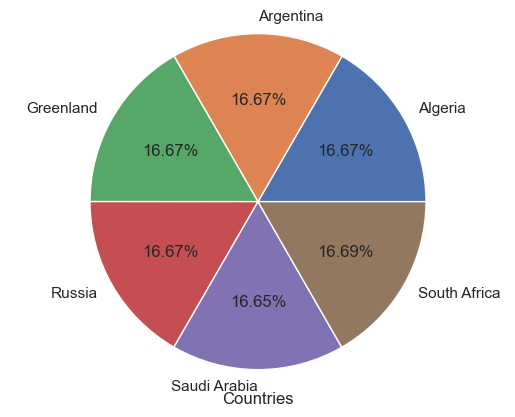

In [7]:
country_data = np.unique(data.country,return_counts=True)
plt.pie(labels=country_data[0],x=country_data[1],autopct='%1.2f%%')
plt.axis('equal')
plt.xlabel("Countries")
plt.show()

**Country**'s feature follows a **uniform distribution** with all countries appaer around 1750 time

#### Median Age

In [8]:
data.median_age.describe()

count    10753.000000
mean        31.560677
std          4.002165
min         27.919000
25%         27.983000
50%         28.731000
75%         33.924000
max         39.071000
Name: median_age, dtype: float64

We see that the mean of median ages of the cases were 31.5, min were 27 and max 39 only.

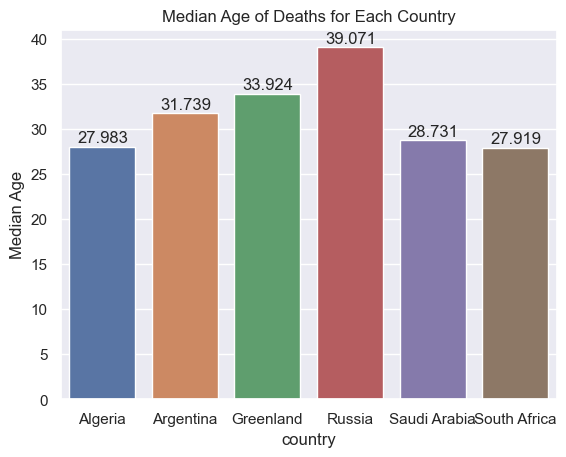

In [9]:
median_age_data = data.groupby(by='country').median_age.max()
sns.barplot(x=median_age_data.index,y=median_age_data.values)
for i,val in enumerate(median_age_data):
    plt.text(x=i-.3,y=val+0.5,s=val)
    
plt.ylabel("Median Age")
plt.title("Median Age of Deaths for Each Country")
plt.show()

#### Total Cases

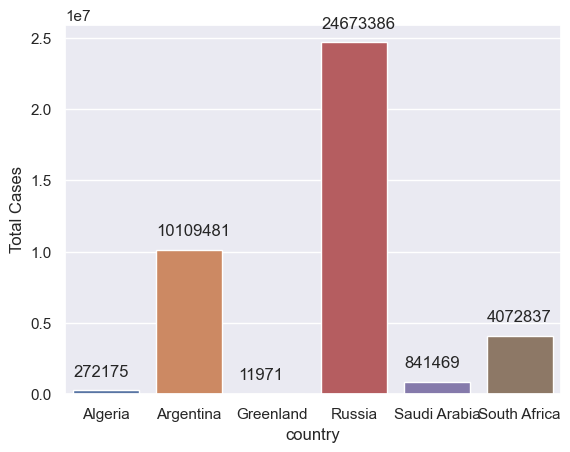

In [10]:
total_cases_data = data.groupby(by='country').total_cases.max()  # Also Sum of new_cases works fine
sns.barplot(x=total_cases_data.index,y=total_cases_data.values)
for i,val in enumerate(total_cases_data):
    plt.text(x=i-.4,y=val+1e6,s=int(val))

plt.ylabel("Total Cases")
plt.show()

#### Total Cases per million

In [11]:
data.total_cases_per_million.describe()

count     10753.000000
mean      73574.218467
std       82105.011151
min           0.000000
25%        5977.497600
50%       26152.596000
75%      156031.080000
max      222637.030000
Name: total_cases_per_million, dtype: float64

We can see that Russia has the biggest record for reported cases.<br>
At inverse Greenland has the least one.

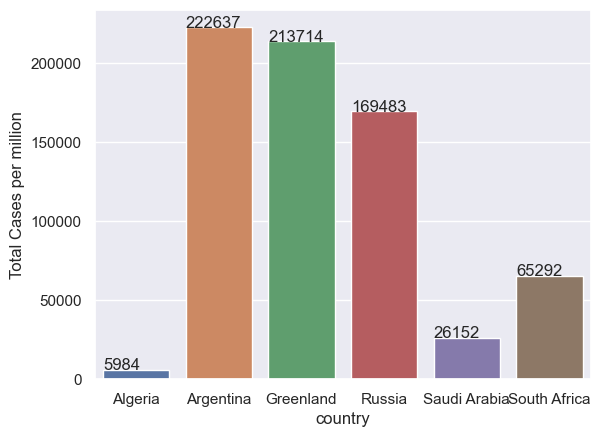

In [12]:
total_cases_per_million_data = data.groupby(by='country').total_cases_per_million.max()
sns.barplot(x=total_cases_per_million_data.index,y=total_cases_per_million_data.values)
for i,val in enumerate(total_cases_per_million_data):
    plt.text(x=i-.4,y=val,s=int(val))

plt.ylabel("Total Cases per million")
plt.show()

We conclude that:
- Argentina,Greenland and Russia are among the most affected countries by covid-19 in the world regard to their population.
- Algeria one of the least affected countries by covid-19 in the world regard to its population.

#### Total Deaths

In [13]:
data.total_deaths.describe()

count     10753.000000
mean      75603.364735
std      116806.546585
min           0.000000
25%        1696.000000
50%        9631.000000
75%      102595.000000
max      403767.000000
Name: total_deaths, dtype: float64

Unfortunaly Russia has recorded around 40k deaths while others less.

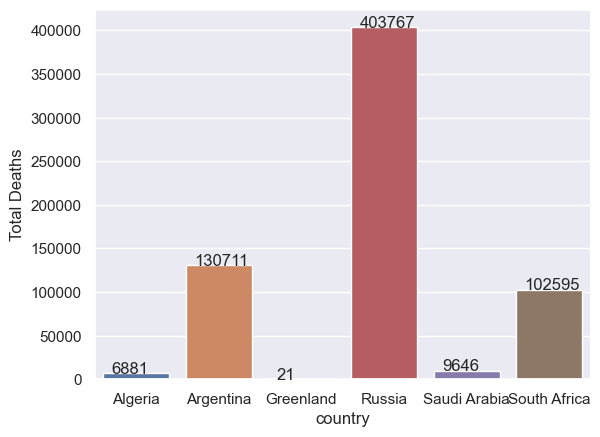

In [14]:
total_deaths_data = data.groupby(by="country").total_deaths.max()
sns.barplot(x=total_deaths_data.index,y=total_deaths_data.values)
for i,val in enumerate(total_deaths_data):
    plt.text(x=i-.3,y=val,s=int(val))

plt.ylabel("Total Deaths")
plt.show()

### Total Deaths per million

In [15]:
data.total_deaths_per_million.describe()

count    10753.000000
mean       963.553249
std       1065.125289
min          0.000000
25%        151.196010
50%        374.906280
75%       1644.719500
max       2878.595700
Name: total_deaths_per_million, dtype: float64

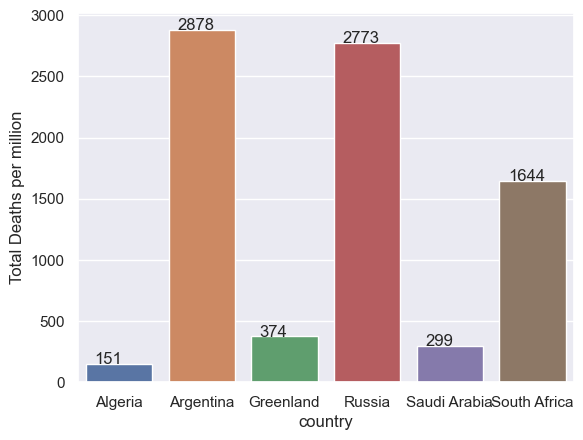

In [16]:
total_deaths_per_million_data = data.groupby(by="country").total_deaths_per_million.max()
sns.barplot(x=total_deaths_per_million_data.index,y=total_deaths_per_million_data.values)
for i,val in enumerate(total_deaths_per_million_data):
    plt.text(x=i-.3,y=val,s=int(val))

plt.ylabel("Total Deaths per million")
plt.show()

Argentina, Russia and South Africa record high deaths record regard thier population.

#### Fatality Rate

In [17]:
data.total_case_fatality_rate.describe()

count    10753.000000
mean         1.769614
std          1.368130
min          0.000000
25%          1.146329
50%          1.704687
75%          2.531157
max         15.834594
Name: total_case_fatality_rate, dtype: float64

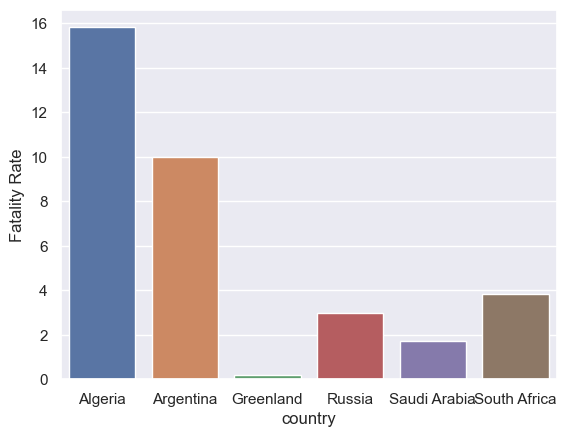

In [18]:
total_case_fatality_rate_data = data.groupby(by="country").total_case_fatality_rate.max()
sns.barplot(x=total_case_fatality_rate_data.index,y=total_case_fatality_rate_data.values)

plt.ylabel("Fatality Rate")
plt.show()

While Algeria doesnt have big number of reported cases and deaths but unfortunaly it has a significant rate of Fatality 16%. 

## Bivariate Analysis

#### Total Cases per million with Total deaths per million

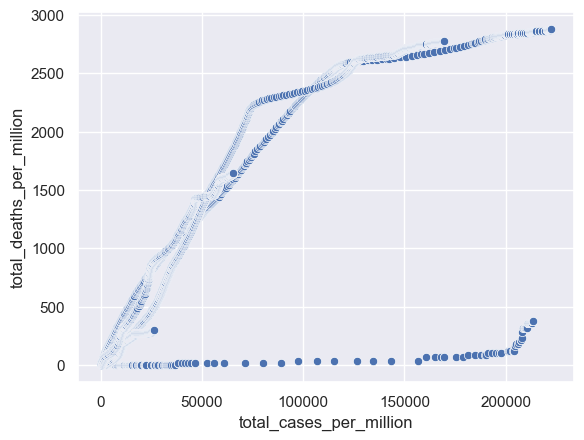

In [19]:
sns.scatterplot(x=data['total_cases_per_million'],y=data['total_deaths_per_million'])
plt.show()

In [20]:
print(f"Correlation Coefficient: {data.total_cases_per_million.corr(data.total_deaths_per_million):.1%}")

Correlation Coefficient: 67.3%


Which means there is positive correlation between total cases and total deaths per million.

#### New Cases vs New Deaths

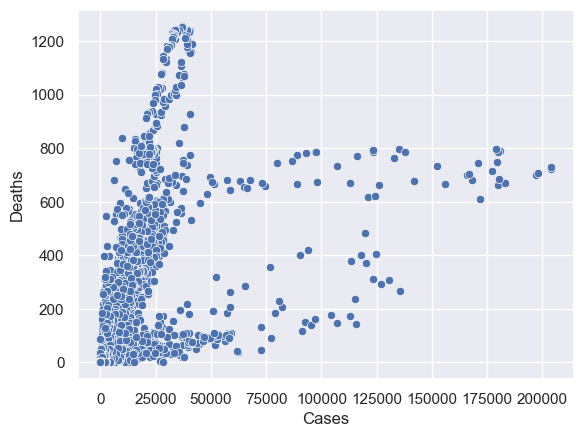

In [21]:
sns.scatterplot(x=data['new_cases'].values,y=data['new_deaths'])
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.show()

In [22]:
print(f"Correlation Coefficient: {data.new_cases.corr(data.new_deaths):.1%}")

Correlation Coefficient: 61.1%


Which means there is positive correlation between cases deaths(more cases imply more deaths).

#### Population vs New Cases

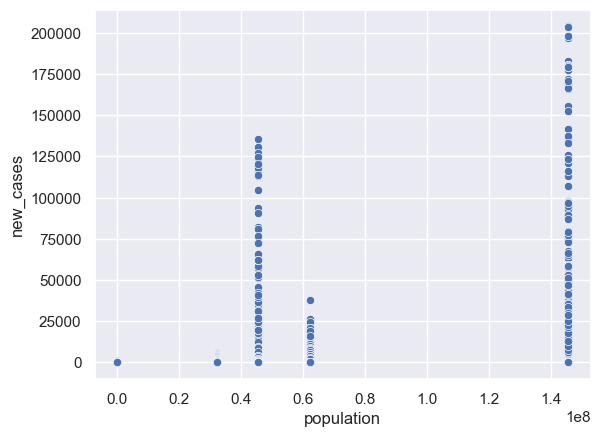

In [23]:
sns.scatterplot(data=data,x='population',y='new_cases')
plt.show()

We see that more population imply more positive cases.

## Geospatial Visualization

## Time Series Analysis

#### New Cases per Date

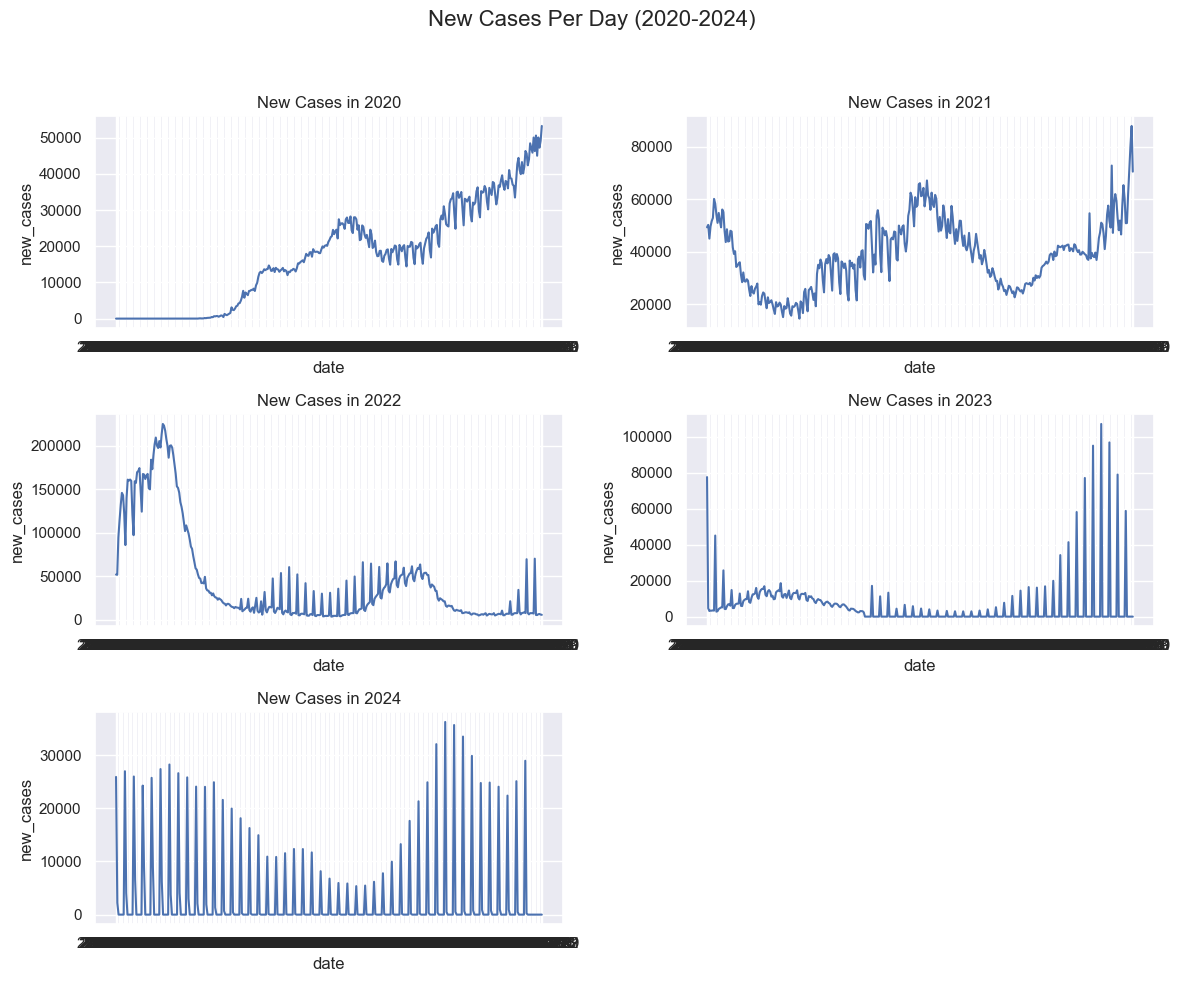

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# In 2020
new_cases_2020 = data.loc[data.date < "2021", ['date', 'new_cases']].groupby(by='date').sum()
sns.lineplot(data=new_cases_2020, x=new_cases_2020.index, y='new_cases', ax=axes[0, 0])
axes[0, 0].set_title("New Cases in 2020")

# In 2021
new_cases_2021 = data.loc[(data.date >= "2021") & (data.date < "2022"), ['date', 'new_cases']].groupby(by='date').sum()
sns.lineplot(data=new_cases_2021, x=new_cases_2021.index, y='new_cases', ax=axes[0, 1])
axes[0, 1].set_title("New Cases in 2021")

# In 2022
new_cases_2022 = data.loc[(data.date >= "2022") & (data.date < "2023"), ['date', 'new_cases']].groupby(by='date').sum()
sns.lineplot(data=new_cases_2022, x=new_cases_2022.index, y='new_cases', ax=axes[1, 0])
axes[1, 0].set_title("New Cases in 2022")

# In 2023
new_cases_2023 = data.loc[(data.date >= "2023") & (data.date < "2024"), ['date', 'new_cases']].groupby(by='date').sum()
sns.lineplot(data=new_cases_2023, x=new_cases_2023.index, y='new_cases', ax=axes[1, 1])
axes[1, 1].set_title("New Cases in 2023")

# In 2024
new_cases_2024 = data.loc[data.date >= "2024", ['date', 'new_cases']].groupby(by='date').sum()
sns.lineplot(data=new_cases_2024, x=new_cases_2024.index, y='new_cases', ax=axes[2, 0])
axes[2, 0].set_title("New Cases in 2024")

axes[2, 1].axis('off')
plt.suptitle("New Cases Per Day (2020-2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- **In 2020** the new positive cases increase each day and reached 50_000 per day.
- **In 2021** the new positive cases increasing and decreasing but it keeps increasing at the end of the year which reached to 80_000 per day.
- **In 2022** in the first half of the year it deacreses half to 40_0000 new cases per day.
- **In 2023** decreased to 20_000 new cases per day but starts increasing at last months of the year(winter) reached 100_000.
- **In 2024** decreased to 30_000 and stays at this range.  

We can conclude that covid-19 speared highly at winter and cold season and less at warm seasons.

#### New Deaths per Date

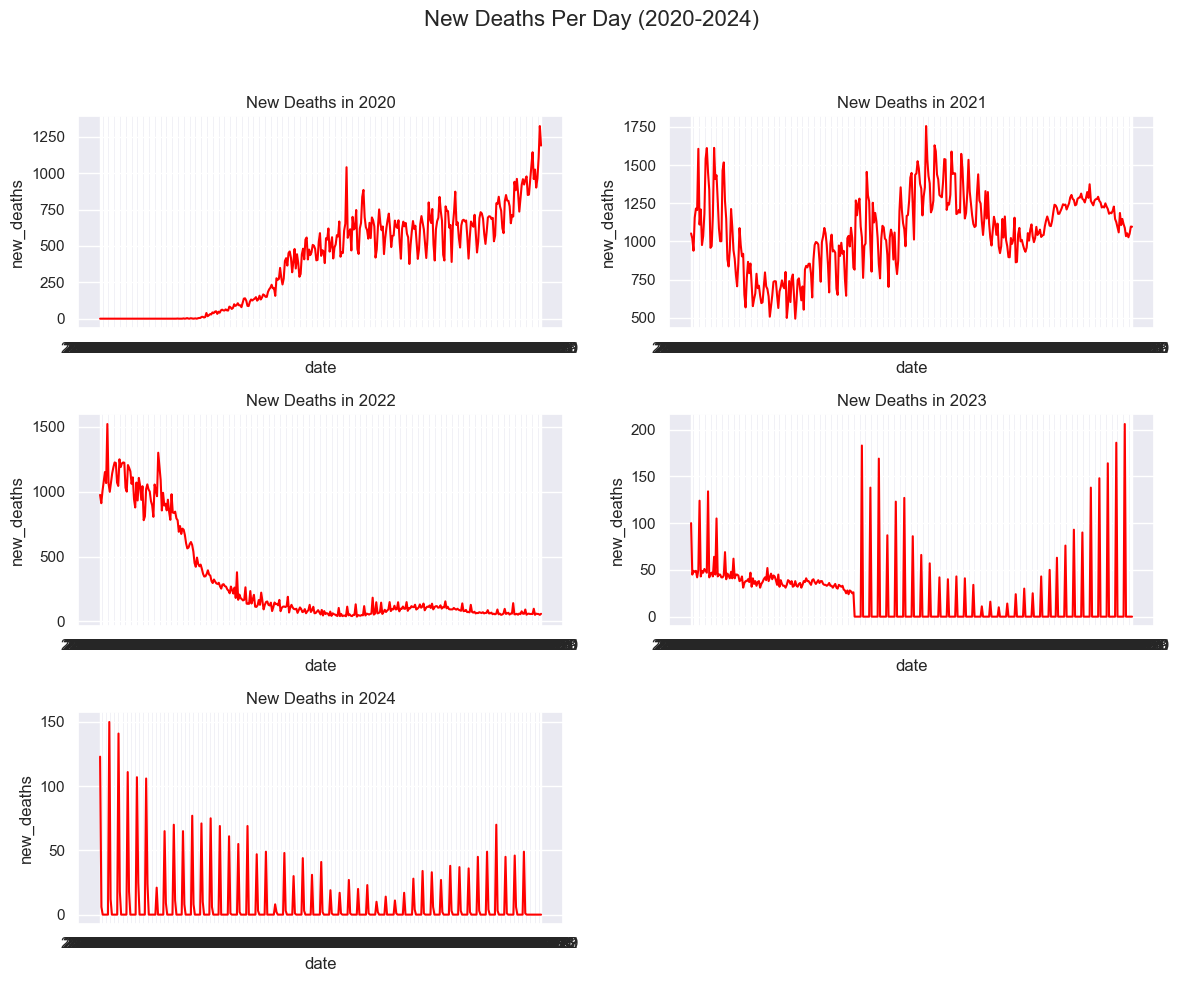

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# In 2020 
new_deaths_2020 = data.loc[data.date < "2021", ['date', 'new_deaths']].groupby(by='date').sum()
sns.lineplot(data=new_deaths_2020, x=new_deaths_2020.index, y='new_deaths', ax=axes[0, 0],color='red')
axes[0, 0].set_title("New Deaths in 2020")

# In 2021
new_deaths_2021 = data.loc[(data.date >= "2021") & (data.date < "2022"), ['date', 'new_deaths']].groupby(by='date').sum()
sns.lineplot(data=new_deaths_2021, x=new_deaths_2021.index, y='new_deaths', ax=axes[0, 1],color='red')
axes[0, 1].set_title("New Deaths in 2021")

# In 2022
new_deaths_2022 = data.loc[(data.date >= "2022") & (data.date < "2023"), ['date', 'new_deaths']].groupby(by='date').sum()
sns.lineplot(data=new_deaths_2022, x=new_deaths_2022.index, y='new_deaths', ax=axes[1, 0],color='red')
axes[1, 0].set_title("New Deaths in 2022")

# In 2023
new_deaths_2023 = data.loc[(data.date >= "2023") & (data.date < "2024"), ['date', 'new_deaths']].groupby(by='date').sum()
sns.lineplot(data=new_deaths_2023, x=new_deaths_2023.index, y='new_deaths', ax=axes[1, 1],color='red')
axes[1, 1].set_title("New Deaths in 2023")

# In 2024
new_deaths_2024 = data.loc[data.date >= "2024", ['date', 'new_deaths']].groupby(by='date').sum()
sns.lineplot(data=new_deaths_2024, x=new_deaths_2024.index, y='new_deaths', ax=axes[2, 0],color='red')
axes[2, 0].set_title("New Deaths in 2024")

axes[2, 1].axis('off')
plt.suptitle("New Deaths Per Day (2020-2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Same concludes as new_cases analysis.

## Multivariate Analysis

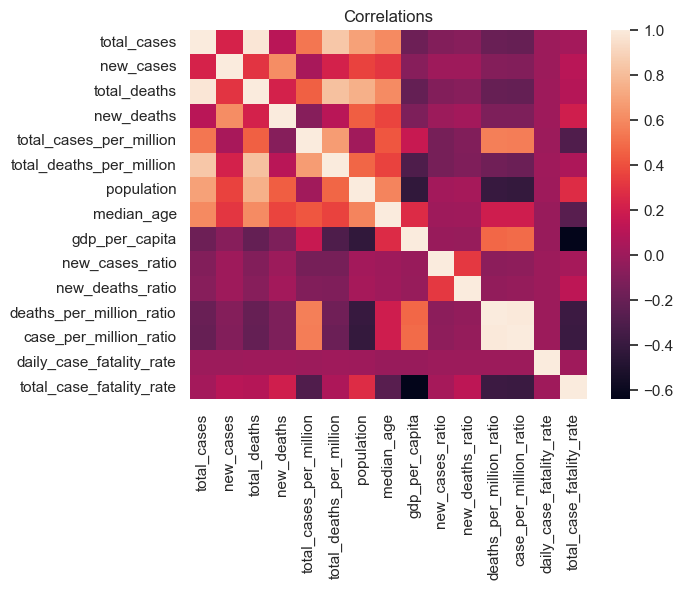

In [ ]:
corrs = data.select_dtypes(include=np.number).corr()
sns.heatmap(corrs)

plt.title("Correlations")
plt.show()

We can see that both **population** and **median age** has high correlation with new reported cases and deaths.<br>
While **gdp per capita** doesnt have a correlation with them except a small one with deaths and case per million ratio. 

### Key Insights

1. **Global Trends:**
   - The number of confirmed cases, deaths, and recoveries increased steadily over time, with noticeable spikes during specific waves of the pandemic.
   - Countries with higher testing rates showed more accurate case counts.

2. **Country-Level Differences:**
   - Developed countries generally had better recovery rates due to advanced healthcare systems and earlier vaccination campaigns.
   - Some developing countries struggled with underreporting due to limited testing resources.

3. **Spread Dynamics:**
   - Highly populated countries experienced faster case spread but also implemented strict measures to slow down the pandemic.

4. **Outliers:**
   - Certain countries showed exceptionally low or high death rates, suggesting differences in healthcare quality or reporting accuracy.

### Conclusion

- The analysis highlights the importance of testing and healthcare infrastructure in managing the pandemic.
- Visualizations and trends provide valuable insights into how countries responded and adapted to the crisis.
- Understanding these patterns can help in better preparation for future global health challenges.